<h1 style="font-size: 38px; text-align: center; color: blue">The implementation of deep learning to develop an adequate tool for identifying the bumblebee species in Ireland</h1>

<br> </br>

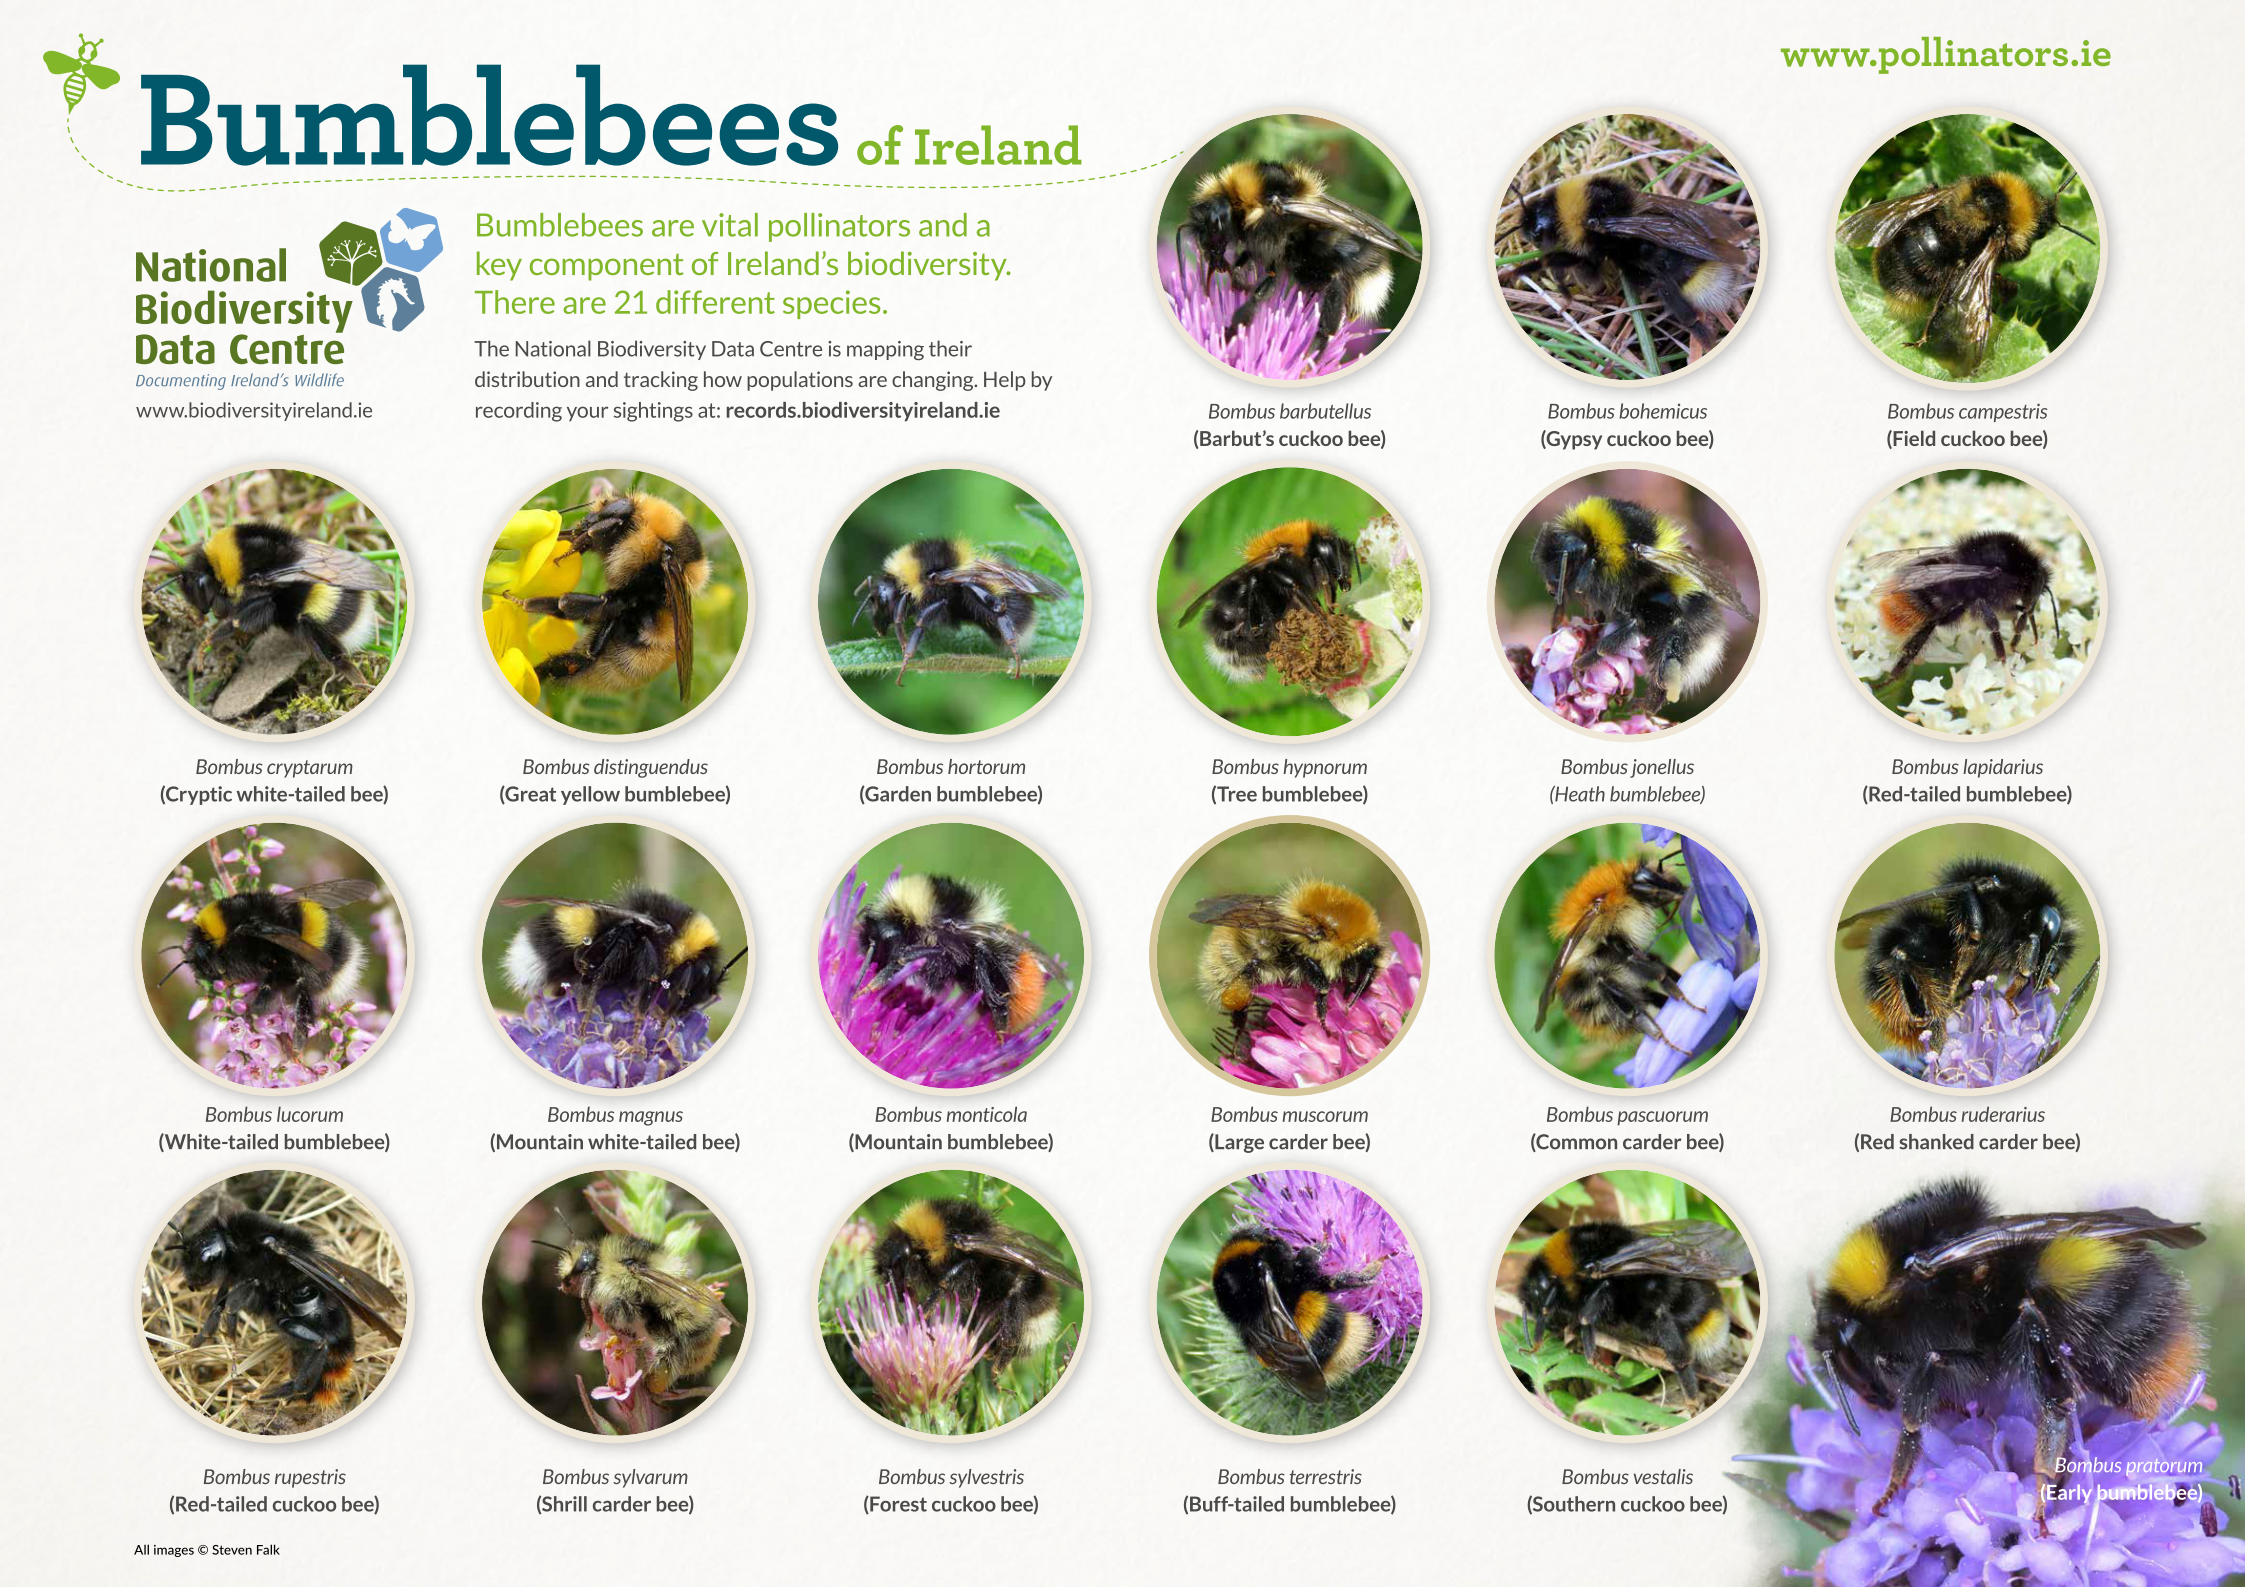

<br> </br>

<h1 style="font-size: 28px; text-align: center; color: green"> 1. Data Preparation </h1>

<br> </br>

In [1]:
# Import libraries
import os
import shutil
import random
import xml.etree.ElementTree as ET
import cv2

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Split the data into two parts, one for training and validating, one for testing

# # Set the path to the root of the data
# image_dir = '/home/hduser/Desktop/final dataset testing'

# # Set the percentage for the training and validating
# # the rest is for testing
# train_percentage = 0.9

# # Create directories for training and testing sets
# train_dir = os.path.join(image_dir, 'train')
# test_dir = os.path.join(image_dir, 'test')
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Create the bumblebee species list
species_list = [
    'barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus',
    'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum',
    'magnus', 'monticola', 'muscorum', 'pascuorum', 'pratorum',
    'ruderarius', 'rupestris', 'sylvarum', 'sylvestris', 'terrestris', 'vestalis'
]

# # Set random seed so that the research is replicable
# random.seed(42)

# # Iterate through each species and copy related images to the train and test folders
# for species in species_list:
#     # Get all images for the 21 bumblebee species
#     species_images = [file for file in os.listdir(image_dir) if species in file]
    
#     # Calculate the number of images for training
#     num_train = int(len(species_images) * train_percentage)
    
#     # Randomly shuffle the list of images
#     random.shuffle(species_images)
    
#     # Split the images into training and testing sets
#     train_images = species_images[:num_train]
#     test_images = species_images[num_train:]
    
#     # Copy images to the corresponding directories
#     for image in train_images:
#         src_path = os.path.join(image_dir, image)
#         dest_path = os.path.join(train_dir, image)
#         shutil.copy(src_path, dest_path)
        
#     for image in test_images:
#         src_path = os.path.join(image_dir, image)
#         dest_path = os.path.join(test_dir, image)
#         shutil.copy(src_path, dest_path)

<br> </br>
<div style="text-align: justify;">
<h1 style="font-size: 18px"> All the images in the <i>train folder</i> were then uploaded onto CVAT (an open-source annotation tool) for annotating. A corresponding annotation file (.xml) was generated after. </h1>
</div>
<br> </br>

In [3]:
# # Transfer the original training images into annotated version (region of interest (ROI))

# # Read the annotation file
# os.chdir('/home/hduser/Desktop/final dataset testing/train')
# xml_file = 'bombus annotations.xml'
# tree = ET.parse(xml_file)
# root = tree.getroot()

# # Create a list to store the annotation details
# annotations = []

# # Extract mandatory info from the annotion and store in the list above
# # Iterate through each 'image' element in the XML
# for image in root.findall('image'):
#     image_id = int(image.get('id'))
#     image_name = image.get('name')
    
#     # For each 'box' element, extract bounding box coordinates
#     for box in image.findall('box'):
#         label = box.get('label')
#         xtl = float(box.get('xtl'))
#         ytl = float(box.get('ytl'))
#         xbr = float(box.get('xbr'))
#         ybr = float(box.get('ybr'))
        
#         annotations.append({
#             'image_id': image_id,
#             'image_name': image_name,
#             'label': label,
#             'xtl': xtl,
#             'ytl': ytl,
#             'xbr': xbr,
#             'ybr': ybr
#         })

# print(annotations) # Check the information

In [4]:
# # Extract ROI and convert all the images in train folder
# for annotation in annotations:
#     image = annotation['image_name']
#     xtl = int(annotation['xtl'])
#     ytl = int(annotation['ytl'])
#     xbr = int(annotation['xbr'])
#     ybr = int(annotation['ybr'])

#     image = cv2.imread(image)
#     roi_bombus = image[ytl:ybr, xtl:xbr]    
#     bombus = f"{annotation['image_name']}"
#     cv2.imwrite(bombus, roi_bombus)

In [5]:
## Split the processed train images into two parts, one for training, one for validating

# # Path to the directory containing processed train images
# input_directory = '/home/hduser/Desktop/final dataset testing/train'

# # Path to the directory for deep learning later
# output_directory = '/home/hduser/Desktop/final dataset testing/machine learning'

# # Create folders for train and validate sets
# train_directory = os.path.join(output_directory, 'train')
# validate_directory = os.path.join(output_directory, 'validate')
# os.makedirs(train_directory, exist_ok=True)
# os.makedirs(validate_directory, exist_ok=True)

# # Define the percentage for training set, hence 20% for validating
# training_percentage = 0.8

# # Set random seed so that the research is replicable
# random.seed(42)

# # Create folders for each species in train and validate sets
# for species in species_list:
#     species_train_folder = os.path.join(train_directory, f'bombus {species}')
#     species_validate_folder = os.path.join(validate_directory, f'bombus {species}')
#     os.makedirs(species_train_folder, exist_ok=True)
#     os.makedirs(species_validate_folder, exist_ok=True)

#     # List all the images for the species
#     species_images = [filename for filename in os.listdir(input_directory) if f'bombus {species}' in filename]

#     # Shuffle the images randomly
#     random.shuffle(species_images)

#     # Calculate the split point based on previously defined training percentage
#     split_point = int(len(species_images) * training_percentage)

#     # Move images to their respective folders
#     for i, filename in enumerate(species_images):
#         source_path = os.path.join(input_directory, filename)

#         if i < split_point:
#             destination_path = os.path.join(species_train_folder, filename)
#         else:
#             destination_path = os.path.join(species_validate_folder, filename)

#         shutil.move(source_path, destination_path)

In [6]:
# # Organising the test folder

# # Path to the directory containing test images
# test_directory = '/home/hduser/Desktop/final dataset testing/test'

# # Create species folders
# for species in species_list:
#     species_folder = os.path.join(test_directory, f'bombus {species}')
#     os.makedirs(species_folder, exist_ok=True)

# # Move testing images to corresponding species folders
# for filename in os.listdir(test_directory):
#     for species in species_list:
#         if species in filename.lower():
#             source_path = os.path.join(test_directory, filename)
#             destination_folder = os.path.join(test_directory, f'bombus {species}')
#             destination_path = os.path.join(destination_folder, filename)  # Include the filename here

#             # Check if the current item is a file before attempting to move it
#             if os.path.isfile(source_path):
#                 # Create the destination folder if it doesn't exist
#                 os.makedirs(destination_folder, exist_ok=True)

#                 shutil.move(source_path, destination_path)
#             break

<br> </br>

<h1 style="font-size: 28px; text-align: center; color: green"> 2. Model Training </h1>

<br> </br>

In [7]:
#!pip3 install tensorflow-addons
#!pip3 install keras-cv

In [8]:
# Import libraries
import pathlib
import itertools
import glob
import numpy as np

import PIL

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
import keras_cv
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

2023-11-29 00:18:16.766380: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 00:18:16.767778: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 00:18:16.794663: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 00:18:16.795277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 00:18:17.364191: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Using TensorFlow backend


In [9]:
# Set data directory for training, validating and testing
training_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/machine learning/train/')
validate_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/machine learning/validate/')
test_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/test')

print(training_data_dir)
print(validate_data_dir)
print(test_data_dir)

/home/hduser/Desktop/final dataset testing/machine learning/train
/home/hduser/Desktop/final dataset testing/machine learning/validate
/home/hduser/Desktop/final dataset testing/test


<br> </br>
- **Check the image in the train folder**

In [10]:
bombus_barbutellus = list(training_data_dir.glob('bombus barbutellus/*'))
len(bombus_barbutellus)

144

/home/hduser/Desktop/final dataset testing/machine learning/train/bombus barbutellus/bombus barbutellus inaturalist 13.8.jpg


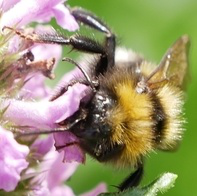

In [11]:
print(bombus_barbutellus[20])
PIL.Image.open(str(bombus_barbutellus[20]))

<br> </br>
## 2.1 Define batches for training and validating

In [34]:
# Specify image size and batch size
img_height, img_width = (224, 224)
batch_size = 32

In [35]:
# Set training batches for deep learning
train_batches = tf.keras.utils.image_dataset_from_directory(
    training_data_dir,
    validation_split=None,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

Found 3024 files belonging to 21 classes.


In [14]:
# Set validating batches for deep learning
validate_batches = tf.keras.utils.image_dataset_from_directory(
    validate_data_dir,
    validation_split=None,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Found 756 files belonging to 21 classes.


In [15]:
# Check the class names
class_names = train_batches.class_names
print(class_names)

['bombus barbutellus', 'bombus bohemicus', 'bombus campestris', 'bombus cryptarum', 'bombus distinguendus', 'bombus hortorum', 'bombus hypnorum', 'bombus jonellus', 'bombus lapidarius', 'bombus lucorum', 'bombus magnus', 'bombus monticola', 'bombus muscorum', 'bombus pascuorum', 'bombus pratorum', 'bombus ruderarius', 'bombus rupestris', 'bombus sylvarum', 'bombus sylvestris', 'bombus terrestris', 'bombus vestalis']


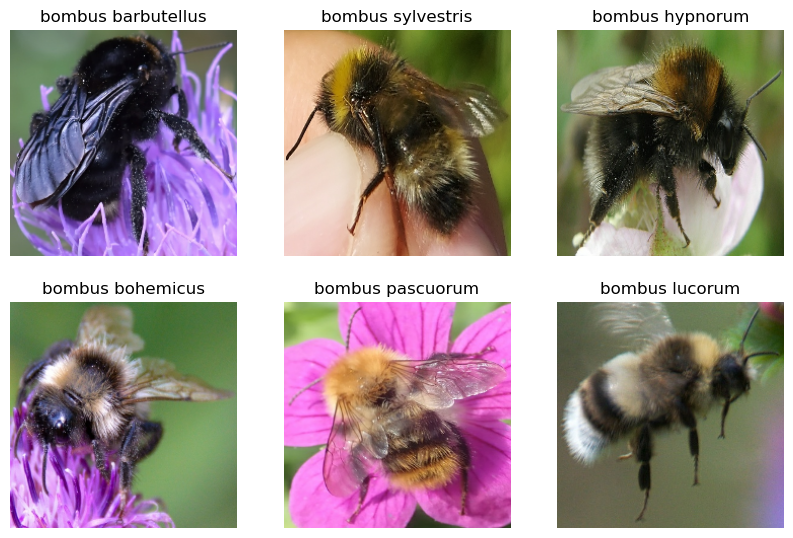

In [16]:
# Visualising the training batches

plt.figure(figsize=(10, 10))
for images, labels in train_batches.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = labels[i].numpy().argmax()
        plt.title(class_names[label_index])
        plt.axis("off")

<br> </br>
<h1 style="font-size: 28px; text-align: center; color: orange"> Data Augmentation </h1>
<br> </br>

- <h1 style="font-size: 16px"> Using augmentation methods, such as RandomPadding, RandomFlip, CutMix, Mixup and Random Augmentation </h1>

In [38]:
augmenter = keras_cv.layers.Augmenter(
    layers=[
        keras_cv.layers.RandomPadding(padding=(10, 10)),
        keras_cv.layers.RandomFlip(mode='horizontal_and_vertical'),
        keras_cv.layers.CutMix(alpha=0.2),
        keras_cv.layers.MixUp(alpha=0.2)
    ]
)

# def apply_combined_augmentations(images, labels):
#     # Apply RandAugment
#     augmented_images_randaug = rand_augment({"images": images})
    
#     # Apply additional augmentations using the augmenter
#     augmented_samples = augmenter({"images": augmented_images_randaug["images"], "labels": labels})
    
#     return augmented_samples["images"], augmented_samples["labels"]

# AUTOTUNE = tf.data.AUTOTUNE

# # Apply the combined augmentations to your dataset
# train_batches_augmented = train_batches.map(apply_combined_augmentations, num_parallel_calls=AUTOTUNE)

In [ ]:
# Define the RandAugment parameters
value_range = (0, 256)
augmentations_per_image = 3
magnitude = 0.7
magnitude_stddev = 0.15
rate = 10/11
geometric = True
seed = 42

# Create a RandAugment layer
rand_augment = keras_cv.layers.RandAugment(
    value_range=value_range,
    augmentations_per_image=augmentations_per_image,
    magnitude=magnitude,
    magnitude_stddev=magnitude_stddev,
    rate=rate,
    geometric=geometric,
    seed=seed
)

In [ ]:
# def apply_rand_augment(image, label):
#     augmented_images = rand_augment({"images": image})
#     return augmented_images["images"], label

# AUTOTUNE = tf.data.AUTOTUNE
# train_batches = train_batches.map(apply_rand_augment, num_parallel_calls=AUTOTUNE)

In [ ]:
# Function to apply augmentation to a batch
def apply_augmentation(batch):
    return augmenter(batch)

# Apply augmentation to the original batches
augmented_train_batches = train_batches.map(apply_augmentation)

# Combine original and augmented batches
train_batches_augmented = train_batches.concatenate(augmented_train_batches)

In [51]:
AUTOTUNE = tf.data.AUTOTUNE

# Apply the combined augmentations to your dataset
train_batches_augmented = train_batches.map(apply_combined_augmentations, num_parallel_calls=AUTOTUNE)

In [24]:
print(len(train_batches_augmented))
print(type(train_batches_augmented))

95
<class 'tensorflow.python.data.ops.map_op._ParallelMapDataset'>


In [ ]:
# Print the number of images in each batch before and after augmentation
for batch_original, batch_augmented in zip(train_batches, train_batches_augmented):
    images_original, _ = batch_original
    images_augmented, _ = batch_augmented
    print("Original Batch Size:", tf.shape(images_original)[0])
    print("Augmented Batch Size:", tf.shape(images_augmented)[0])
    print("---")

In [52]:
# Original number of images
original_image_count = sum(1 for _ in train_batches.unbatch())
print(f"Original Number of Images: {original_image_count}")

# Augmented number of images
augmented_image_count = sum(1 for _ in train_batches_augmented.unbatch())
print(f"Augmented Number of Images: {augmented_image_count}")

Original Number of Images: 3024
Augmented Number of Images: 6048


In [45]:
def visualize_batches(batches, title):
    plt.figure(figsize=(6, 6)).suptitle(title, fontsize=18)
    for i, (images, labels) in enumerate(iter(batches.take(9))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

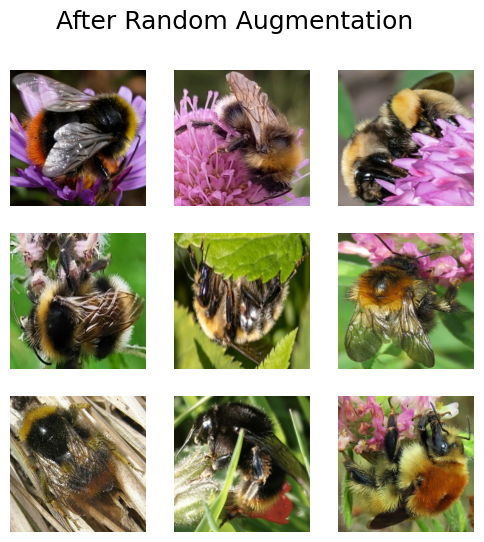

In [53]:
visualize_batches(train_batches_augmented, 'After Augmentation')

Number of Images in a Batch: 64


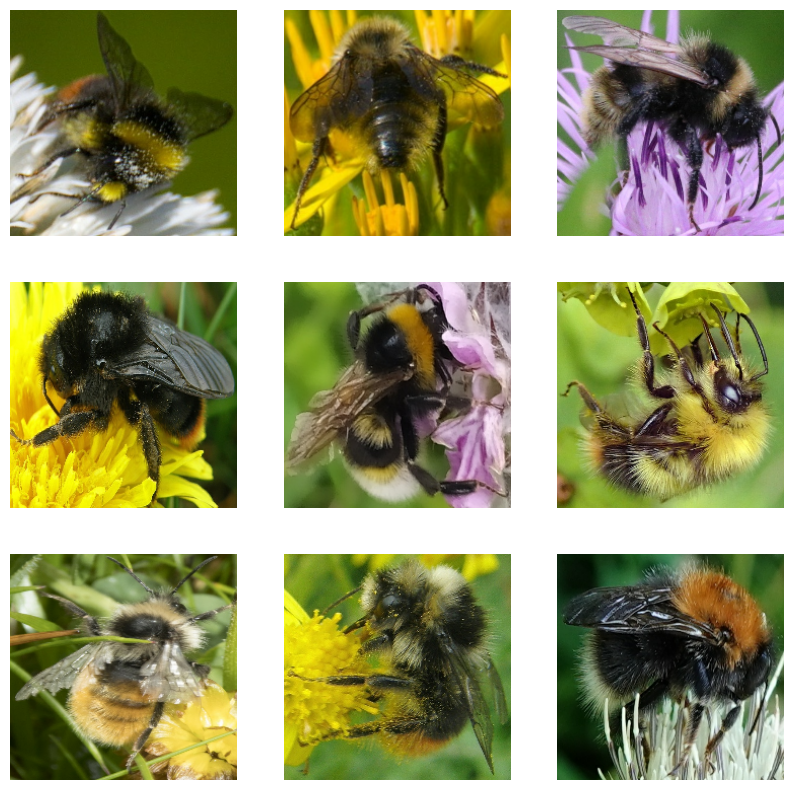

In [54]:
# Print the number of images in a batch
example_batch = next(iter(train_batches_augmented.take(1)))
images, _ = example_batch
print("Number of Images in a Batch:", images.shape[0])

# Visualize a few images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

<br> </br>
- <h1 style="font-size: 16px"> Experimentation. May delete </h1>

In [36]:
# def compute_mean_pixel_value(images):
#     mean_value = tf.reduce_mean(images, axis=(0, 1, 2))
#     return mean_value.numpy()

# # Example usage:
# example_batch = next(iter(train_batches.take(1)))
# images, _ = example_batch  # Extract images from the batch
# mean_pixel_value = compute_mean_pixel_value(images)
# print("Mean Pixel Value:", mean_pixel_value)

Mean Pixel Value: [121.85768  111.24952   80.326065]


In [37]:
# # Define padding parameters
# padding_value = [int(mean_pixel_value[0]), int(mean_pixel_value[1])]
# print(padding_value)

# # Create a Padding layer
# pad_layer = keras_cv.layers.Pad(padding=padding_value)

[121, 111]


In [ ]:
def apply_combined_augmentations(images, labels):
    # Apply padding
    padded_images = tf.pad(images, [[0, 0], [padding_value[0], padding_value[0]], 
                                    [padding_value[1], padding_value[1]], [0, 0]])
    
    # Apply RandAugment
    # augmented_images_randaug = rand_augment({"images": padded_images})

    # Apply additional augmentations using the augmenter
    augmented_samples = augmenter({"images": padded_images, "labels": labels})
    
    return augmented_samples["images"], augmented_samples["labels"]

AUTOTUNE = tf.data.AUTOTUNE

# Apply the combined augmentations to your dataset
train_batches_augmented = train_batches.map(apply_combined_augmentations, num_parallel_calls=AUTOTUNE)

In [ ]:
def apply_combined_augmentations(images, labels):
    # Apply padding
    padded_images = tf.pad(images, [[0, 0], [padding_value[0], padding_value[0]], 
                                    [padding_value[1], padding_value[1]], [0, 0]])
    
    resized_images = tf.image.resize(padded_images, (224, 224))

    # Create a dictionary for augmenter
    input_dict = {"images": resized_images, "labels": labels}

    # Apply additional augmentations using the augmenter
    augmented_samples = augmenter(input_dict)
    
    return augmented_samples["images"], augmented_samples["labels"]

In [ ]:
def apply_combined_augmentations(images, labels):
    # Apply padding
    padded_images = tf.pad(images, [[0, 0], [padding_value[0], padding_value[0]], 
                                    [padding_value[1], padding_value[1]], [0, 0]])

    # Create a dictionary for augmenter
    input_dict = {"images": padded_images, "labels": labels}

    # Apply additional augmentations using the augmenter
    augmented_samples = augmenter(input_dict)

    # Print shapes for debugging
    print("Original Images Shape:", images.shape)
    print("Augmented Images Shape:", augmented_samples["images"].shape)
    
    return augmented_samples["images"], augmented_samples["labels"]

In [ ]:
cut_mix = keras_cv.layers.CutMix()
mix_up = keras_cv.layers.MixUp()

In [ ]:
def cut_mix_and_mix_up(samples):
    # Assuming samples is a dictionary with keys "images" and "labels"
    images = samples["images"]
    labels = samples["labels"]

    # Apply cut_mix and mix_up transformations
    images = cut_mix(images, training=True)
    images, labels = mix_up(images, labels, training=True)

    # Return the augmented samples
    return {"images": images, "labels": labels}

# Apply the function to your dataset
train_batches = train_batches.map(cut_mix_and_mix_up, num_parallel_calls=AUTOTUNE)

In [ ]:
visualize_dataset(train_dataset, title="After CutMix and MixUp")

<br> </br>
- <h1 style="font-size: 16px"> Since Inception-related models use different input size, below we define new variables for training and validating Inception-related models. </h1>
<br> </br>

In [ ]:
img_height_inception, img_width_inception = (299, 299)

In [ ]:
train_batches_inception = tf.keras.utils.image_dataset_from_directory(
    training_data_dir,
    validation_split=None,
    label_mode='categorical',
    image_size=(img_height_inception, img_width_inception),
    batch_size=batch_size,
    shuffle=True
)

validate_batches_inception = tf.keras.utils.image_dataset_from_directory(
    validate_data_dir,
    validation_split=None,
    label_mode='categorical',
    image_size=(img_height_inception, img_width_inception),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_batches_inception.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = labels[i].numpy().argmax()
        plt.title(class_names[label_index])
        plt.axis("off")

In [ ]:
train_batches_inception = train_batches_inception.map(apply_rand_augment, num_parallel_calls=AUTOTUNE)

In [ ]:
visualize_batches(train_batches_inception, 'After Random Augmentation')

<br> </br>
## 2.2 Deep learning using tensorflow and keras
<br> </br>

### 2.2.1. ResNet101

In [55]:
# Download pre-tuned CNN model, i.e. ResNet152
resnet101 = tf.keras.applications.ResNet101(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    weights='imagenet')

for layer in resnet101.layers:
        layer.trainable=False
        
resnet101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv4_block9_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block9_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block9_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block9_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block9_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block9_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block9_3_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv4_block12_1_relu (Acti  (None, 14, 14, 256)          0         ['conv4_block12_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block12_2_conv (Conv  (None, 14, 14, 256)          590080    ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_2_bn (BatchN  (None, 14, 14, 256)          1024      ['conv4_block12_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 ion)                                                                                             
                                                                                                  
 conv4_block15_1_conv (Conv  (None, 14, 14, 256)          262400    ['conv4_block14_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block15_1_bn (BatchN  (None, 14, 14, 256)          1024      ['conv4_block15_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block15_1_relu (Acti  (None, 14, 14, 256)          0         ['conv4_block15_1_bn[0][0]']  
 vation)                                                                                          
          

 conv4_block17_3_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block17_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block17_add (Add)     (None, 14, 14, 1024)         0         ['conv4_block16_out[0][0]',   
                                                                     'conv4_block17_3_bn[0][0]']  
                                                                                                  
 conv4_block17_out (Activat  (None, 14, 14, 1024)         0         ['conv4_block17_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block18_1_conv (Conv  (None, 14, 14, 256)          262400    ['conv4_block17_out[0][0]']   
 2D)      

                                                                                                  
 conv4_block20_2_relu (Acti  (None, 14, 14, 256)          0         ['conv4_block20_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block20_3_conv (Conv  (None, 14, 14, 1024)         263168    ['conv4_block20_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_3_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block20_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block23_2_conv (Conv  (None, 14, 14, 256)          590080    ['conv4_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block23_2_bn (BatchN  (None, 14, 14, 256)          1024      ['conv4_block23_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block23_2_relu (Acti  (None, 14, 14, 256)          0         ['conv4_block23_2_bn[0][0]']  
 vation)                                                                                          
          

 conv5_block2_add (Add)      (None, 7, 7, 2048)           0         ['conv5_block1_out[0][0]',    
                                                                     'conv5_block2_3_bn[0][0]']   
                                                                                                  
 conv5_block2_out (Activati  (None, 7, 7, 2048)           0         ['conv5_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv5_block3_1_conv (Conv2  (None, 7, 7, 512)            1049088   ['conv5_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv5_block3_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_1_conv[0][0]'] 
 rmalizati

In [57]:
# Create a CNN model based on ResNet152
model_resnet101 = Sequential()
model_resnet101.add(resnet101)
model_resnet101.add(Flatten())
model_resnet101.add(Dense(512, activation='relu'))
model_resnet101.add(Dropout(0.2))
model_resnet101.add(Dense(21, activation='softmax'))

In [58]:
model_resnet101.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 21)                10773     
                                                                 
Total params: 43718037 (166.77 MB)
Trainable params: 1059861 (4.04 MB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________


In [59]:
model_resnet101.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
epoch_resnet101 = 10

result_resnet101 = model_resnet101.fit(train_batches_augmented,
                                       validation_data=validate_batches,
                                       epochs=epoch_resnet101,
                                       verbose=2)

Epoch 1/10
95/95 - 215s - loss: 3.0116 - accuracy: 0.1000 - val_loss: 2.4165 - val_accuracy: 0.2341 - 215s/epoch - 2s/step
Epoch 2/10
95/95 - 215s - loss: 2.6222 - accuracy: 0.1794 - val_loss: 2.0771 - val_accuracy: 0.3690 - 215s/epoch - 2s/step
Epoch 3/10
95/95 - 217s - loss: 2.4513 - accuracy: 0.2348 - val_loss: 2.0054 - val_accuracy: 0.3995 - 217s/epoch - 2s/step
Epoch 4/10
95/95 - 220s - loss: 2.3487 - accuracy: 0.2619 - val_loss: 1.8921 - val_accuracy: 0.4140 - 220s/epoch - 2s/step
Epoch 5/10
95/95 - 220s - loss: 2.2610 - accuracy: 0.2826 - val_loss: 1.8031 - val_accuracy: 0.4643 - 220s/epoch - 2s/step
Epoch 6/10
95/95 - 220s - loss: 2.1810 - accuracy: 0.3185 - val_loss: 1.7492 - val_accuracy: 0.4563 - 220s/epoch - 2s/step
Epoch 7/10


<br> </br>
- <h1 style="font-size: 16px"> Create functions for plotting. </h1>
<br> </br>

In [ ]:
# Create a function for plotting accuracy fluctuation

def plot_accuracy(epochs, history, model_name):
    plt.figure(figsize=(8, 8))
    
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, history['accuracy'], label="Training Accuracy", color='green')
    plt.plot(epochs_range, history['val_accuracy'], label="Validation Accuracy", color='blue', linestyle='--')
    
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.7)
    
    plt.title(f'Train and Validation Accuracy of {model_name} Model')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    plt.show()

In [ ]:
# Create a function for plotting loss fluctuation

def plot_loss(epochs, history, model_name):
    plt.figure(figsize=(8, 8))
    
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, history['loss'], label="Training Loss", color='green')
    plt.plot(epochs_range, history['val_loss'], label="Validation Loss", color='blue', linestyle='--')

    plt.grid(True, alpha=0.7)
    
    plt.title(f'Train and Validation Loss of {model_name} Model')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

    plt.show()

In [ ]:
# Create a function for plotting confusion matrix

def plot_confusion_matrix(model, batches, model_name):
    # Make predictions
    predictions = model.predict(batches)

    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Extract true labels from the batches
    true_labels = np.concatenate([y for x, y in batches], axis=0)
    true_labels = np.argmax(true_labels, axis=1)

    # Get class names from the batches
    class_names = batches.class_names
    
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    # Loop to annotate each cell in the heatmap
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center',
                     bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix of {model_name} Model', fontsize=20)
    plt.show()

In [ ]:
# Create a function for plotting report overview

def plot_classification_report(model, batches, model_name):
    # Make predictions
    predictions = model.predict(batches)

    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Extract true labels from the batches
    true_labels = np.concatenate([y for x, y in batches], axis=0)
    true_labels = np.argmax(true_labels, axis=1)

    # Get class names from the batches
    class_names = batches.class_names
    
    # Generate classification report dictionary
    report_dict = classification_report(true_labels, predicted_labels, 
                                        target_names=class_names, output_dict=True)

    # Extract metrics for each class
    precision = [report_dict[class_name]['precision'] for class_name in class_names]
    recall = [report_dict[class_name]['recall'] for class_name in class_names]
    f1_score = [report_dict[class_name]['f1-score'] for class_name in class_names]

    # Plotting using subplots
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), sharex=True)

    # Plot precision
    axs[0].bar(class_names, precision, color='blue')
    axs[0].set_ylabel('Precision')
    axs[0].set_title('Precision by Class')
    axs[0].grid(True, alpha=0.5)

    # Plot recall
    axs[1].bar(class_names, recall, color='green')
    axs[1].set_ylabel('Recall')
    axs[1].set_title('Recall by Class')
    axs[1].grid(True, alpha=0.5)

    # Plot F1-score
    axs[2].bar(class_names, f1_score, color='orange')
    axs[2].set_xlabel('Class Names')
    axs[2].set_ylabel('F1-Score')
    axs[2].set_title('F1-Score by Class')
    axs[2].grid(True, alpha=0.5)

    # Adjust layout and rotate x-axis labels
    plt.tight_layout(pad=7.0)
    plt.xticks(rotation=45, ha='right')
    
    # Add a title on top
    plt.suptitle(f'Classification Report Overview of {model_name} Model', fontsize=20)

    plt.show()

In [ ]:
# Create a function for printing classification report

def print_classification_report(model, batches):
    # Make predictions
    predictions = model.predict(batches)

    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Extract true labels from the batches
    true_labels = np.concatenate([y for x, y in batches], axis=0)
    true_labels = np.argmax(true_labels, axis=1)

    # Get class names from the batches
    class_names = batches.class_names
    
    # Generate classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    
    print("Classification Report:\n", report)

In [ ]:
# Create a function for plotting ROC curves

def plot_roc_curves(model, batches, model_name):
    predictions = model.predict(batches)
    true_labels = np.concatenate([y for x, y in batches], axis=0)
    class_names = batches.class_names

    plt.figure(figsize=(14, 10))

    for class_index in range(len(class_names)):
        fpr, tpr, _ = roc_curve(true_labels[:, class_index], predictions[:, class_index])
        auc_score = auc(fpr, tpr)
        label = f'{class_names[class_index]} (AUC = {auc_score:.2f})'
        plt.plot(fpr, tpr, label=label)

    plt.xlabel('False Positive Rate (Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    
    plt.title(f'ROC Curves of {model_name} Model', fontsize=16)
    plt.grid(True, alpha=0.5)
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=2, title="Species Name")

    plt.show()

<br> </br>

In [ ]:
plot_accuracy(epoch_resnet152, result_resnet152.history, 'ResNet152')

In [ ]:
plot_loss(epoch_resnet152, result_resnet152.history, 'ResNet152')

In [ ]:
plot_confusion_matrix(model_resnet152, validate_batches, 'ResNet152')

In [ ]:
plot_classification_report(model_resnet152, validate_batches, 'ResNet152')

In [ ]:
print_classification_report(model_resnet152, validate_batches)

In [ ]:
plot_roc_curves(model_resnet152, validate_batches, 'ResNet152')

### 2.2.2 InceptionV3

In [ ]:
inceptionv3 = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(299, 299, 3),
    pooling='avg',
    weights='imagenet')

for layer in inceptionv3.layers:
        layer.trainable=False

In [ ]:
inceptionv3.summary()

In [ ]:
model_inceptionv3 = Sequential()

model_inceptionv3.add(inceptionv3)
model_inceptionv3.add(Flatten())
model_inceptionv3.add(Dense(512, activation='relu'))
model_inceptionv3.add(Dropout(0.2))
model_inceptionv3.add(Dense(21, activation='softmax'))

In [ ]:
model_inceptionv3.summary()

In [ ]:
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
epoch_inceptionv3 = 10

result_inceptionv3 = model_inceptionv3.fit(train_batches_inception,
                                           validation_data=validate_batches_inception,
                                           epochs=epoch_inceptionv3,
                                           verbose=2)